In [1]:
function high_freq_protocol(t,t1,f,amp,width,n,tmax)

    if n == 1
        throw(ArgumentError("Can't have n = 1, use 'single_pulse.jl'"))
    end

    #make pulse times
    ti = zeros(1,n)
    ti[1] = t1
    for i = 2:n
        ti[i] = t1 + (i-1)*(1/f)
    end

    #loop to prevent pulse overlap and pulses outside time window
    if (ti[2]-width/2) <= (ti[1]+width/2)
        throw(ArgumentError("Pulses overlap: Reconsider arguments WIDTH and F."))
    elseif ti[n]+width/2 >= tmax
        throw(ArgumentError("Input is not within time window."))
    end

    #make the pulses
    f = 0
    for i = 1:n
        if (t>ti[i]-width/2) & (t<ti[i]+width/2)
            f = amp
        end
    end
    tend = ti[n] + 3*(1/f)

    return f
end

high_freq_protocol (generic function with 1 method)

In [2]:
input = t-> high_freq_protocol(t,0.2,5,10,0.1,10,5)

#3 (generic function with 1 method)

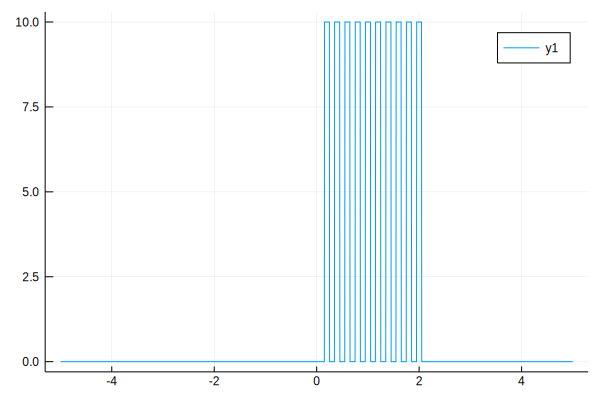

In [3]:
using Plots
plot(input)